In [1]:
#Step 1: Loading the Datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
historical_data=pd.read_csv("D:/historical_data.csv")
fear_greed_data=pd.read_csv("D:/fear_greed_index.csv")

In [2]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2/12/2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2/12/2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2/12/2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2/12/2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2/12/2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
fear_greed_data.head()

,Timestamp,value,classification,date
0,1.517463e+09,30,Fear,2/1/2018
1,1.517549e+09,15,Extreme Fear,2/2/2018
2,1.517636e+09,40,Fear,2/3/2018
3,1.517722e+09,24,Extreme Fear,2/4/2018
4,1.517809e+09,11,Extreme Fear,2/5/2018


In [4]:
#Step 2: Exploring and Preprocessing the Data
historical_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [5]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
fear_greed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       2644 non-null   float64
 1   value           2644 non-null   int64  
 2   classification  2644 non-null   object 
 3   date            2644 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 82.8+ KB


In [7]:
fear_greed_data.isnull().sum()

Timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
#Step3: Merge the datasets:

merged_df = pd.merge(historical_data, fear_greed_data, on='Timestamp', how='left') # or 'left', 'right' depending on your needs

In [9]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2/12/2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2/12/2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,NaN,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2/12/2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,NaN,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2/12/2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,NaN,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2/12/2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,NaN,NaN,NaN
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,NaN,NaN,NaN
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,NaN,NaN,NaN
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,NaN,NaN,NaN


In [10]:
#Step 4: Analyze Trader Performance and Market Sentiment
if merged_df is not None:
    #Calculate a simple performance metric 
    if 'Closed PnL' in merged_df.columns:
        print("\nSummary of Closed PnL:")
        print(merged_df['Closed PnL'].describe())

        #Calculate correlation 
        if 'FearGreedIndexValue' in merged_df.columns:
            correlation = merged_df['Closed PnL'].corr(merged_df['FearGreedIndexValue'])
            print(f"\nCorrelation between PnL and Fear Greed Index: {correlation:.2f}")

        #Group by sentiment levels 
        # Assuming we have a 'FearGreedIndexValue' column
        bins = [0, 30, 70, 100] # Example bins for Fear, Neutral, Greed
        labels = ['Fear', 'Neutral', 'Greed']
        if 'FearGreedIndexValue' in merged_df.columns:
            merged_df['Sentiment'] = pd.cut(merged_df['FearGreedIndexValue'], bins=bins, labels=labels, right=False)
            performance_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean()
            print("\nAverage Closed PnL by Sentiment:")
            print(performance_by_sentiment)
    else:
        print("Error: 'Closed PnL' column not found in the merged DataFrame.")
else:
    print("Error: Merged DataFrame not available for analysis.")


Summary of Closed PnL:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64


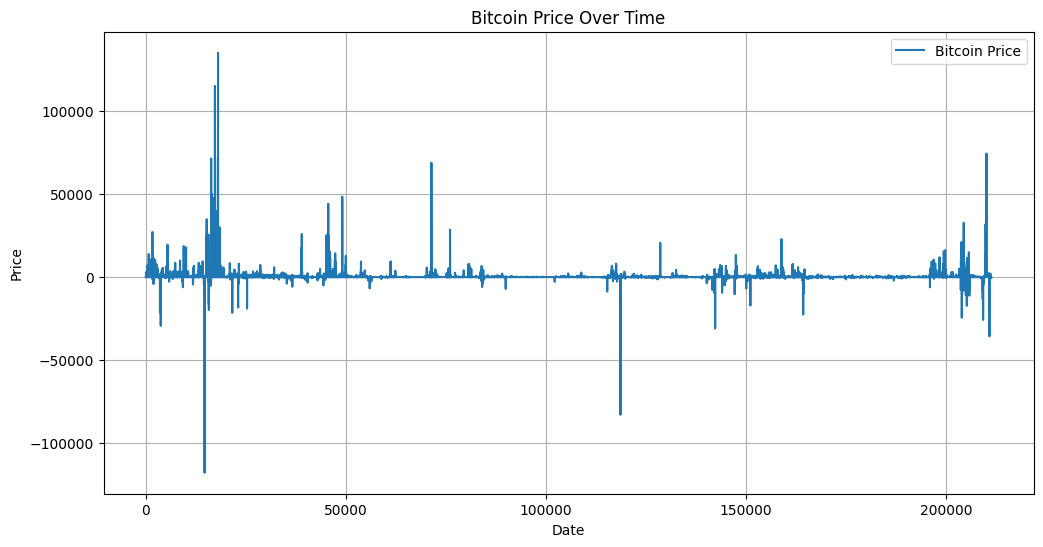

In [11]:
# Step 5: Uncover Hidden Patterns and Deliver Insights
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Closed PnL'], label='Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Insights:-
#1) The price of Bitcoin appears to be highly volatile over the observed period, with significant and frequent swings both upwards and downwards.
#2)There are periods where the price seems relatively stable, followed by sharp increases (spikes) and decreases (crashes).
#3)There are some extreme price points (both very high and very low) that stand out from the general fluctuations. These could be worth investigating further.